unit 2 / lesson 4 / project 4

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [2]:
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')

In [3]:
df

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
8,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN
9,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN


In [4]:
df.drop([0, 1, 2], axis=0, inplace = True)

In [5]:
df

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
8,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN
9,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN
10,Allegany Village,1781,3,0,NaN,0,0,3,10,0,10,0,0
11,Amherst Town,118296,107,1,NaN,7,31,68,2118,204,1882,32,3
12,Amityville Village,9519,9,0,NaN,2,4,3,210,16,188,6,1


In [6]:
df.columns = df.iloc[0]

In [7]:
df

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
8,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN
9,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN
10,Allegany Village,1781,3,0,NaN,0,0,3,10,0,10,0,0
11,Amherst Town,118296,107,1,NaN,7,31,68,2118,204,1882,32,3
12,Amityville Village,9519,9,0,NaN,2,4,3,210,16,188,6,1


In [8]:
df.drop([3], axis=0, inplace = True)

In [9]:
df

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
8,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN
9,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN
10,Allegany Village,1781,3,0,NaN,0,0,3,10,0,10,0,0
11,Amherst Town,118296,107,1,NaN,7,31,68,2118,204,1882,32,3
12,Amityville Village,9519,9,0,NaN,2,4,3,210,16,188,6,1
13,Amsterdam,18182,30,0,NaN,0,12,18,405,99,291,15,0


In [10]:
df = df.reset_index(drop=True)

In [11]:
df

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN
5,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN
6,Allegany Village,1781,3,0,NaN,0,0,3,10,0,10,0,0
7,Amherst Town,118296,107,1,NaN,7,31,68,2118,204,1882,32,3
8,Amityville Village,9519,9,0,NaN,2,4,3,210,16,188,6,1
9,Amsterdam,18182,30,0,NaN,0,12,18,405,99,291,15,0


In [12]:
df.drop([348, 349, 350], axis=0, inplace = True)

In [13]:
df.rename(columns={ df.columns[0]: "city" }, inplace=True)
df.rename(columns={ df.columns[1]: "population" }, inplace=True)
df.rename(columns={ df.columns[2]: "violent_crime" }, inplace=True)
df.rename(columns={ df.columns[3]: "murder_nonnegligent_manslaughter" }, inplace=True)
df.rename(columns={ df.columns[4]: "rape_rev1" }, inplace=True)
df.rename(columns={ df.columns[5]: "rape_legacy" }, inplace=True)
df.rename(columns={ df.columns[6]: "robbery" }, inplace=True)
df.rename(columns={ df.columns[7]: "aggravated_assult" }, inplace=True)
df.rename(columns={ df.columns[8]: "property_crime" }, inplace=True)
df.rename(columns={ df.columns[9]: "burglary" }, inplace=True)
df.rename(columns={ df.columns[10]: "larceny_theft" }, inplace=True)
df.rename(columns={ df.columns[11]: "motor_vehicle_theft" }, inplace=True)
df.rename(columns={ df.columns[12]: "arson3" }, inplace=True)

In [14]:
df

3,city,population,violent_crime,murder_nonnegligent_manslaughter,rape_rev1,rape_legacy,robbery,aggravated_assult,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN
5,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN
6,Allegany Village,1781,3,0,NaN,0,0,3,10,0,10,0,0
7,Amherst Town,118296,107,1,NaN,7,31,68,2118,204,1882,32,3
8,Amityville Village,9519,9,0,NaN,2,4,3,210,16,188,6,1
9,Amsterdam,18182,30,0,NaN,0,12,18,405,99,291,15,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 347
Data columns (total 13 columns):
city                                348 non-null object
population                          348 non-null object
violent_crime                       348 non-null object
murder_nonnegligent_manslaughter    348 non-null object
rape_rev1                           0 non-null object
rape_legacy                         348 non-null object
robbery                             348 non-null object
aggravated_assult                   348 non-null object
property_crime                      348 non-null object
burglary                            348 non-null object
larceny_theft                       348 non-null object
motor_vehicle_theft                 348 non-null object
arson3                              187 non-null object
dtypes: object(13)
memory usage: 38.1+ KB


In [16]:
df.drop(['rape_rev1'], axis=1, inplace = True)

In [17]:
df = df.fillna(0)

In [18]:
df['population'] = df['population'].astype('Int64')
df['violent_crime'] = df['violent_crime'].astype('Int64')
df['murder_nonnegligent_manslaughter'] = df['murder_nonnegligent_manslaughter'].astype('Int64')
df['rape_legacy'] = df['rape_legacy'].astype('Int64')
df['robbery'] = df['robbery'].astype('Int64')
df['aggravated_assult'] = df['aggravated_assult'].astype('Int64')
df['property_crime'] = df['property_crime'].astype('Int64')
df['burglary'] = df['burglary'].astype('Int64')
df['larceny_theft'] = df['larceny_theft'].astype('Int64')
df['motor_vehicle_theft'] = df['motor_vehicle_theft'].astype('Int64')
df['arson3'] = df['arson3'].astype('Int64')


In [19]:
df['pop_sqrt'] = np.sqrt(df['population'])

In [20]:
df

3,city,population,violent_crime,murder_nonnegligent_manslaughter,rape_legacy,robbery,aggravated_assult,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3,pop_sqrt
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0,43.139309
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0,50.764161
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0,53.347915
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,0,312.979233
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,0,79.924965
5,Alfred Village,4089,5,0,0,3,2,46,10,36,0,0,63.945289
6,Allegany Village,1781,3,0,0,0,3,10,0,10,0,0,42.201896
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32,3,343.941856
8,Amityville Village,9519,9,0,2,4,3,210,16,188,6,1,97.565363
9,Amsterdam,18182,30,0,0,12,18,405,99,291,15,0,134.840647


In [21]:
df['murder_bool'] = 0
df['robbery_bool'] = 0

for index, row in df.iterrows():
    if row['murder_nonnegligent_manslaughter'] > 0:
        df.loc[index, 'murder_bool'] = 1

for index, row in df.iterrows():
    if row['robbery'] > 0:
        df.loc[index, 'robbery_bool'] = 1       

In [22]:
df

3,city,population,violent_crime,murder_nonnegligent_manslaughter,rape_legacy,robbery,aggravated_assult,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3,pop_sqrt,murder_bool,robbery_bool
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0,43.139309,0,0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0,50.764161,0,0
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0,53.347915,0,0
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,0,312.979233,1,1
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,0,79.924965,0,1
5,Alfred Village,4089,5,0,0,3,2,46,10,36,0,0,63.945289,0,1
6,Allegany Village,1781,3,0,0,0,3,10,0,10,0,0,42.201896,0,0
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32,3,343.941856,1,1
8,Amityville Village,9519,9,0,2,4,3,210,16,188,6,1,97.565363,0,1
9,Amsterdam,18182,30,0,0,12,18,405,99,291,15,0,134.840647,0,1


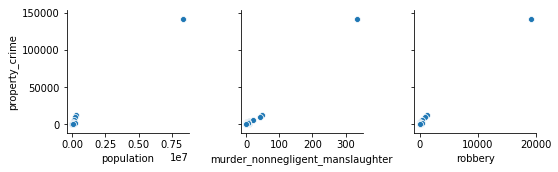

In [23]:
sns.pairplot(df, x_vars=['population', 'murder_nonnegligent_manslaughter', 'robbery'], y_vars='property_crime')

In [27]:
df.sort_values('population', ascending=False)

3,city,population,violent_crime,murder_nonnegligent_manslaughter,rape_legacy,robbery,aggravated_assult,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3,pop_sqrt,murder_bool,robbery_bool
216,New York,8396126,52384,335,1112,19170,31767,141971,16606,117931,7434,0,2897.606944,1,1
35,Buffalo,258789,3249,47,145,1322,1735,12491,3458,8076,957,0,508.713082,1,1
272,Rochester,210562,2107,42,92,918,1055,10051,2587,6855,609,132,458.870352,1,1
346,Yonkers,199134,1036,6,25,390,615,2368,470,1662,236,10,446.244328,1,1
310,Syracuse,143834,1192,21,75,400,696,6473,1781,4298,394,57,379.254532,1,1
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32,3,343.941856,1,1
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,0,312.979233,1,1
126,Greece Town,96667,151,0,9,60,82,2303,332,1925,46,0,310.913171,0,1
267,Ramapo Town,87204,57,2,5,9,41,567,88,466,13,0,295.303234,1,1
57,Clarkstown Town,80705,65,0,8,17,40,1515,99,1388,28,0,284.086255,0,1


In [28]:
8396126/258789

32.443906039282965

* New York is more than 32times larger than the second largest population, making it an outlier

* I will remove New York from the dataset to train the model

In [32]:
df.drop(216, inplace=True)

In [33]:
df.sort_values('population', ascending=False)

3,city,population,violent_crime,murder_nonnegligent_manslaughter,rape_legacy,robbery,aggravated_assult,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3,pop_sqrt,murder_bool,robbery_bool
35,Buffalo,258789,3249,47,145,1322,1735,12491,3458,8076,957,0,508.713082,1,1
272,Rochester,210562,2107,42,92,918,1055,10051,2587,6855,609,132,458.870352,1,1
346,Yonkers,199134,1036,6,25,390,615,2368,470,1662,236,10,446.244328,1,1
310,Syracuse,143834,1192,21,75,400,696,6473,1781,4298,394,57,379.254532,1,1
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32,3,343.941856,1,1
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,0,312.979233,1,1
126,Greece Town,96667,151,0,9,60,82,2303,332,1925,46,0,310.913171,0,1
267,Ramapo Town,87204,57,2,5,9,41,567,88,466,13,0,295.303234,1,1
57,Clarkstown Town,80705,65,0,8,17,40,1515,99,1388,28,0,284.086255,0,1
214,New Rochelle,78800,175,0,5,81,89,1391,150,1172,69,0,280.713377,0,1


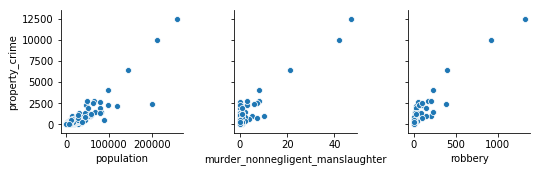

In [34]:
sns.pairplot(df, x_vars=['population', 'murder_nonnegligent_manslaughter', 'robbery'], y_vars='property_crime')

In [35]:
df.corr()

3,population,violent_crime,murder_nonnegligent_manslaughter,rape_legacy,robbery,aggravated_assult,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3,pop_sqrt,murder_bool,robbery_bool
3,,,,,,,,,,,,,,
population,1.000000,0.829460,0.756401,0.796629,0.815525,0.834682,0.887255,0.819673,0.901166,0.828005,0.508028,0.927883,0.502713,0.344347
violent_crime,0.829460,1.000000,0.955360,0.962262,0.994261,0.996734,0.944352,0.970857,0.912669,0.987230,0.565682,0.641378,0.405794,0.167994
murder_nonnegligent_manslaughter,0.756401,0.955360,1.000000,0.946053,0.963290,0.937605,0.917135,0.956201,0.881394,0.959146,0.670760,0.565535,0.408036,0.132058
rape_legacy,0.796629,0.962262,0.946053,1.000000,0.948705,0.958098,0.948834,0.973732,0.920649,0.960143,0.567135,0.627864,0.402744,0.188700
robbery,0.815525,0.994261,0.963290,0.948705,1.000000,0.982856,0.932889,0.964123,0.898423,0.988945,0.580098,0.619127,0.377718,0.154016
aggravated_assult,0.834682,0.996734,0.937605,0.958098,0.982856,1.000000,0.941948,0.964421,0.912521,0.977253,0.545155,0.653445,0.421846,0.175605
property_crime,0.887255,0.944352,0.917135,0.948834,0.932889,0.941948,1.000000,0.976608,0.994632,0.949023,0.619828,0.755100,0.443475,0.266769
burglary,0.819673,0.970857,0.956201,0.973732,0.964123,0.964421,0.976608,1.000000,0.949552,0.976357,0.631524,0.656446,0.401800,0.197380
larceny_theft,0.901166,0.912669,0.881394,0.920649,0.898423,0.912521,0.994632,0.949552,1.000000,0.916178,0.607978,0.788476,0.457711,0.297171


## Model 1: using the suggested features
𝑃𝑟𝑜𝑝𝑒𝑟𝑡𝑦𝑐𝑟𝑖𝑚𝑒=𝛼+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛2+𝑀𝑢𝑟𝑑𝑒𝑟+𝑅𝑜𝑏𝑏𝑒𝑟𝑦

In [36]:
feature_cols = ['population', 'pop_sqrt', 'murder_bool', 'robbery_bool']

In [38]:
X = df[feature_cols]

In [39]:
y = df['property_crime']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [44]:
linreg_est = LinearRegression()
linreg_est.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
y_pred = linreg_est.predict(X_test)

Text(0, 0.5, 'Predicted Y')

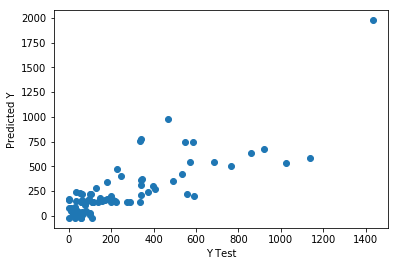

In [46]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### Root mean squared error 

In [49]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

174.24566709645134


## Model 2: selecting other features

In [52]:
df.corr()

3,population,violent_crime,murder_nonnegligent_manslaughter,rape_legacy,robbery,aggravated_assult,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3,pop_sqrt,murder_bool,robbery_bool
3,,,,,,,,,,,,,,
population,1.000000,0.829460,0.756401,0.796629,0.815525,0.834682,0.887255,0.819673,0.901166,0.828005,0.508028,0.927883,0.502713,0.344347
violent_crime,0.829460,1.000000,0.955360,0.962262,0.994261,0.996734,0.944352,0.970857,0.912669,0.987230,0.565682,0.641378,0.405794,0.167994
murder_nonnegligent_manslaughter,0.756401,0.955360,1.000000,0.946053,0.963290,0.937605,0.917135,0.956201,0.881394,0.959146,0.670760,0.565535,0.408036,0.132058
rape_legacy,0.796629,0.962262,0.946053,1.000000,0.948705,0.958098,0.948834,0.973732,0.920649,0.960143,0.567135,0.627864,0.402744,0.188700
robbery,0.815525,0.994261,0.963290,0.948705,1.000000,0.982856,0.932889,0.964123,0.898423,0.988945,0.580098,0.619127,0.377718,0.154016
aggravated_assult,0.834682,0.996734,0.937605,0.958098,0.982856,1.000000,0.941948,0.964421,0.912521,0.977253,0.545155,0.653445,0.421846,0.175605
property_crime,0.887255,0.944352,0.917135,0.948834,0.932889,0.941948,1.000000,0.976608,0.994632,0.949023,0.619828,0.755100,0.443475,0.266769
burglary,0.819673,0.970857,0.956201,0.973732,0.964123,0.964421,0.976608,1.000000,0.949552,0.976357,0.631524,0.656446,0.401800,0.197380
larceny_theft,0.901166,0.912669,0.881394,0.920649,0.898423,0.912521,0.994632,0.949552,1.000000,0.916178,0.607978,0.788476,0.457711,0.297171


In [53]:
feature_cols2 = ['population', 'violent_crime', 'murder_nonnegligent_manslaughter', 'rape_legacy', 'robbery', 'aggravated_assult', 'burglary', 'larceny_theft', 'motor_vehicle_theft', 'arson3']

In [54]:
X2 = df[feature_cols2]

In [55]:
y2 = df['property_crime']

In [56]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,random_state=1)

In [57]:
linreg_est2 = LinearRegression()
linreg_est2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
y_pred2 = linreg_est2.predict(X_test2)

Text(0, 0.5, 'Predicted Y 2')

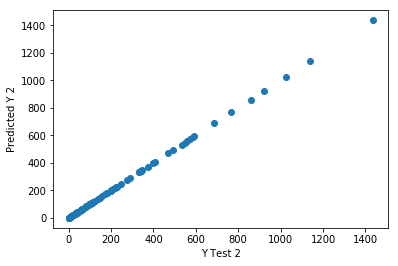

In [59]:
plt.scatter(y_test2,y_pred2)
plt.xlabel('Y Test 2')
plt.ylabel('Predicted Y 2')

In [60]:
print(np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

7.533657566374147e-13


## Conclusion
I'm not sure the purpose of the property squared and the categorical variables for robbery and murder. 

There was more correlation between population and propertycrime than population^2 and propertycrime.  So, I chose to go with population instead of population^2.

Usining the categorical variables the model produced a MSE of 174.  This isn't good.

By creating a model with all the actual data available, I was able to get MSE of 7.5, which I consider to be very good.  
